# The Sparks Foundation - Machine Learning/ Data Science Task 1 

- <i>**Created by Harsh Chudasama** <br>
## To Explore Supervised Machine Learning 
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# Task 1 - Importing Libraries and Loading Dataset

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('ggplot')

In [3]:
data = pd.read_csv("scores.csv")

In [11]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Task 2 : Exploratory Data Analysis

In [5]:
data.shape

(25, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


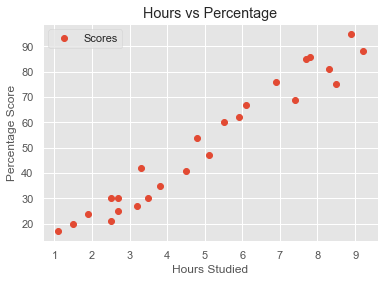

In [29]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [38]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

### **Splitting the data into Train(80%) and Test(20%) sets** 

In [12]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

C:\Users\lenono\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Percentage Score')

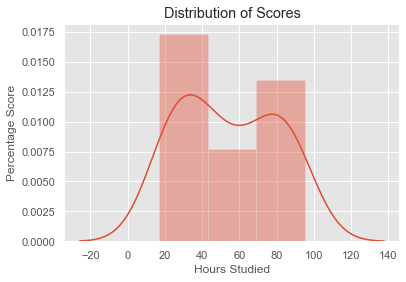

In [30]:
sns.distplot(y_train, kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 

C:\Users\lenono\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Percentage Score')

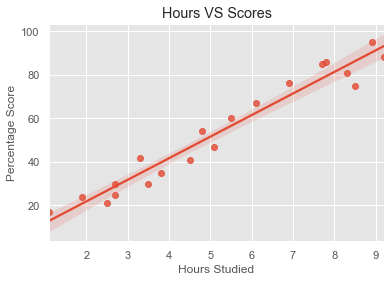

In [31]:
sns.regplot(X_train, y_train)
plt.title('Hours VS Scores')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 

# Task 3 : **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [35]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training complete using " + str(regressor))

Training complete using LinearRegression()


In [19]:
#predicting the test set results
y_pred = regressor.predict(X_test)

# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head(5)

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Task 4 : **Visualizing the Results**

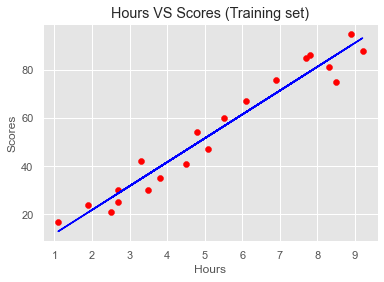

In [20]:
#visualising the training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train,  regressor.predict(X_train), color= 'blue')
plt.title('Hours VS Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

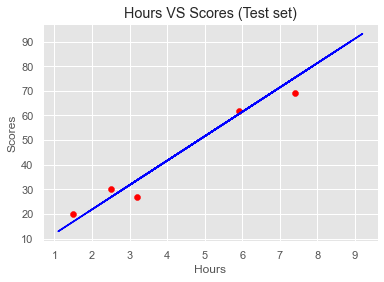

In [21]:
#visualising the test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train,  regressor.predict(X_train), color= 'blue')
plt.title('Hours VS Scores (Test set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# Task 5 : **Model Evaluation**

In [22]:
k = X_test.shape[1]
n = len(X_test)
n

5

In [28]:
from sklearn.metrics import r2_score
from math import sqrt
from sklearn import metrics  
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('R2 =', r2, '\nAdjusted R2 =', adj_r2)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

R2 = 0.9454906892105356 
Adjusted R2 = 0.9273209189473808
Mean Absolute Error: 4.183859899002975


# Task 6 : **Predicting Future Data**

In [27]:
Hours = 9.25
my_pred = regressor.predict([[Hours]])
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(my_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538
